# Import necessary libraries

In [1]:
#Importing Necessary Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import pathlib
import cv2
import seaborn as sns

from tensorflow.keras.preprocessing.image import load_img, img_to_array   
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Defines the file paths

for the two image directories containing images of people with and without masks

In [2]:
# Define the file paths for the image directories
with_mask_dir = r"C:\Users\Magda\archive (4)\Mask_detection_images\with_mask"
without_mask_dir = r"C:\Users\Magda\archive (4)\Mask_detection_images\without_mask"

In [3]:
# Get the file paths and labels for all the images
with_mask_paths = [os.path.join(with_mask_dir, filename) for filename in os.listdir(with_mask_dir)]
without_mask_paths = [os.path.join(without_mask_dir, filename) for filename in os.listdir(without_mask_dir)]
image_paths = with_mask_paths + without_mask_paths
labels = ['mask'] * len(with_mask_paths) + ['no_mask'] * len(without_mask_paths)

# Creates a Pandas dataframe

creates a Pandas dataframe that stores the file paths and corresponding labels for each image.

In [4]:
# Create a Pandas dataframe with the image paths and labels
image_df = pd.DataFrame({
    'image_path': image_paths,
    'label': labels
})

In [5]:
image_df.head()

,image_path,label
0,C:\Users\Magda\archive (4)\Mask_detection_imag...,mask
1,C:\Users\Magda\archive (4)\Mask_detection_imag...,mask
2,C:\Users\Magda\archive (4)\Mask_detection_imag...,mask
3,C:\Users\Magda\archive (4)\Mask_detection_imag...,mask
4,C:\Users\Magda\archive (4)\Mask_detection_imag...,mask


# The distribution of the classes in the dataset using a bar chart:

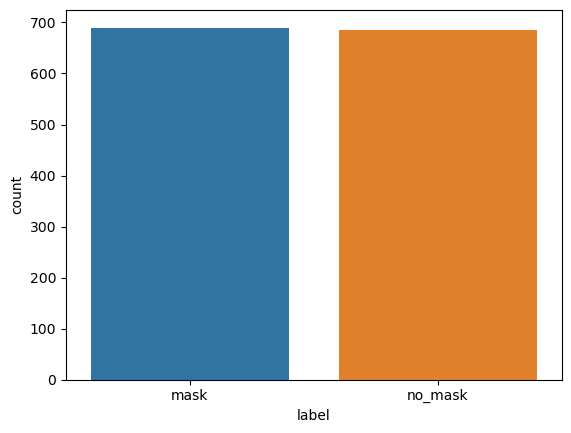

In [6]:
# Create a bar chart showing the distribution of the classes
sns.countplot(x='label', data=image_df)
plt.show()

# Here's an example of a single image from the dataset:

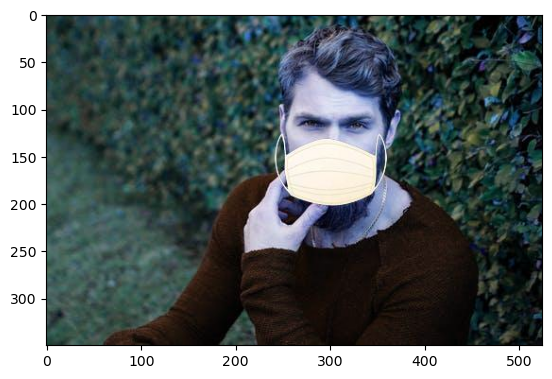

In [7]:
# Display a single image
img = cv2.imread(image_df['image_path'][0])
plt.imshow(img)
plt.show()

# Function to preprocess the images

for the model, which involves resizing them to a standard size of 224x224 pixels, converting them into a NumPy array, and applying pre-processing for the MobileNetV2 model. 

In [8]:
# Preprocess the images
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224, 224))
    image = img_to_array(image)
    image = tf.keras.applications.mobilenet_v2.preprocess_input(image)
    return image

Then, it applies this function to all images in the dataset using a list comprehension.

In [9]:
# Preprocess all the images in the dataset
images = [preprocess_image(image_path) for image_path in image_df['image_path']]

# Convert the labels into binary values

In [10]:
# Convert the labels to binary values
labels = pd.get_dummies(image_df['label']).values

# Splitting the dataset into training and testing sets.

In [11]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Defines the machine learning model

using MobileNetV2 as the base model architecture and adding a few additional layers on top. 

In [12]:
# Create the machine learning model
model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3), include_top=False)
model.trainable = False
flatten_layer = tf.keras.layers.Flatten()(model.output)
output_layer = tf.keras.layers.Dense(2, activation='softmax')(flatten_layer)
model = tf.keras.models.Model(inputs=model.input, outputs=output_layer)

# Compile the model 

In [13]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Prints the shapes of the input and output data for training and testing.

In [14]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1100, 224, 224, 3)
y_train shape: (1100, 2)
X_test shape: (276, 224, 224, 3)
y_test shape: (276, 2)


# Train the model

for 10 epochs with a batch size of 32 and uses the validation data for evaluating the model during training.

In [15]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
35/35 [==============================] - 64s 2s/step - loss: 0.2238 - accuracy: 0.9736 - val_loss: 0.2666 - val_accuracy: 0.9819
Epoch 2/10
35/35 [==============================] - 55s 2s/step - loss: 0.1015 - accuracy: 0.9955 - val_loss: 0.4532 - val_accuracy: 0.9783
Epoch 3/10
35/35 [==============================] - 51s 1s/step - loss: 0.0382 - accuracy: 0.9936 - val_loss: 0.3765 - val_accuracy: 0.9783
Epoch 4/10
35/35 [==============================] - 47s 1s/step - loss: 0.1156 - accuracy: 0.9973 - val_loss: 0.4702 - val_accuracy: 0.9819
Epoch 5/10
35/35 [==============================] - 50s 1s/step - loss: 0.0541 - accuracy: 0.9973 - val_loss: 0.3258 - val_accuracy: 0.9855
Epoch 6/10
35/35 [==============================] - 57s 2s/step - loss: 9.5128e-06 - accuracy: 1.0000 - val_loss: 0.2904 - val_accuracy: 0.9891
Epoch 7/10
35/35 [==============================] - 48s 1s/step - loss: 1.1575e-06 - accuracy: 1.0000 - val_loss: 0.2913 - val_accuracy: 0.9891
Epoch 8/10
3

# Deploy the model

In [ ]:
# Deploy the model for real-time face mask detection
cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    if not ret:
        break
    img = cv2.resize(frame, (224, 224))
    img = img_to_array(img)
    img = tf.keras.applications.mobilenet_v2.preprocess_input(img)
    img = img.reshape(1, 224, 224, 3)
    pred = model.predict(img)
    label = ['with_mask', 'without_mask'][pred.argmax()]
    cv2.putText(frame, label, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.imshow('Face Mask Detection', frame)
    if cv2.waitKey(1) == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 108ms/step
